# Chaîne de masse-ressort

## LU2PY222 - CC - 28 février 2024 - 8h30 - Durée 4h00.

## Modèle
On considère une chaîne de $N+2$ masses $m$ numérotées de $0$ à $N+1$ et reliées entre elles par des ressorts de raideur $k$. Les masses $0$ et $N+1$ sont maintenues fixes et on applique une force $F \cos(\omega t)$, qui varie sinusoidalement en fonction du temps $t$, sur la masse $N$.

Après un régime transitoire, le déplacement de la masse $n$ par rapport à sa position d'équilibre est: $A_n \cos(\omega t)$ où $A_n$ est un réel positif ou négatif. Ainsi, les déplacements des masses sont synchronisées, mais chaque déplacement a une amplitude $A_n$ différente. Ce deplacement peut même s'inverser (en opposition de phase) lorsque l'amplitude $A_n$ est négative.

Les amplitudes $A_n$ des déplacements de chaque masse vérifient la relation de récurrence: $A_0=0$, $A_{N+1}=0$, $-m\omega^2 A_n=k(A_{n+1}+A_{n-1}-2A_n)$ pour $n$ de 1 à $N-1$ et $-m\omega^2 A_N=k(A_{N-1}-2A_N)+F$.

Pour résoudre le problème numériquement, on utilise $\sqrt{k/m}$ comme unité pour les pulsations, $F/k$ comme unité pour les amplitudes et on pose $A_n = A u_n$ et $u_1=1$. On en déduit que la suite d'éléments $u_n$ a pour relation de récurrence

$$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ $$


avec le facteur $A$ donné par $$A=\frac{1}{(2-\omega^2)u_N-u_{N-1}} \ \ \ .$$

## Travail demandé

**La notation prendra en compte la structure et le soin apporté au compte-rendu, les éléments de réflexions que vous apporterez pour répondre au problème, les explications de votre démarche, la syntaxe et la clarté (commentaires) du code produit. Vous apporterez un soin particulier aux graphiques produits.**

**RAPPEL IMPORTANT** : le compte-rendu est **personnel** et **original**. Toutes lignes de codes non-triviales partagées entre camarades seront sanctionnées. Vous avez accès au site JupyterHub pour composer (ainsi que tout document présent sur votre espace JupyterHub), Moodle pour remettre le devoir, au site web de l'UE, ainsi qu'à vos notes écrites.

### Partie I

Dans un premier temps, il vous est demandé de montrer que le système de masse-ressort présente un phénomène de résonance pour certaines valeurs de la pulsation $\omega_r$ de la force d'excitation $F$. 

1) Commencez par calculer et représenter les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$, où $U$ est la valeur maximale de la suite, pour $\omega=\pi/N$ et $N=1000$. Est-ce que les conditions aux limites sont respectées?



In [4]:
# importation des modules
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def elements_suite_norm(omega, N):
    ''' Renvoie les éléments de la suite u_n normalisés par le maximum de la suite 
    
    Args:
        omega (float): pulsation
        N (int): nombre de masses et de ressorts

    Returns:
        numpy array: éléments de la suite normalisés

    '''
    # initialisation du tableau numpy des termes de la suite 
    suite = np.empty(N+2)
    suite[0] = 0.
    suite[1] = 1.
    suite[N+1] = 0.

    # itération des termes de la suite
    for _i in range(2,N+1):
        suite[_i] = (2 - omega**2) * suite[_i-1] - suite[_i-2]

    # retour
    return suite/np.max(suite)

In [6]:
# calcul des termes de la suite pour la première résonance
N = 1000
omega = np.pi/N
suite1 = elements_suite_norm(omega, N)

Text(0.5, 0, 'n/N')

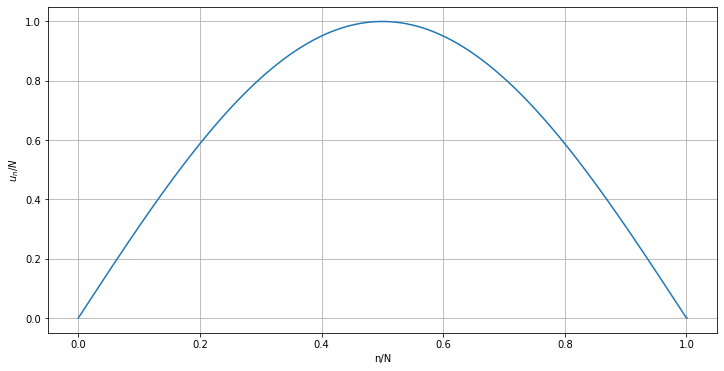

In [7]:
# indices normalisés des termes de la suite u_n/N
X = np.array(range(N+2))/N

# graphique représentant les termes de la suite u_n/N
plt.figure(figsize=(12,6))
plt.plot(X, suite1)
plt.grid()
plt.ylabel('$u_n/N$')
plt.xlabel('n/N')

On voit que le déplacement est nul au départ et à la fin, ce qui montre visuellement que les cnoditions aux limites sont respectées

2) Ensuite, représentez les valeurs du facteur $|A|$ en fonction du paramètre $N \omega / \pi$, pour $N=1000$ et $\omega=[0, 20/N]$. Utilisez une échelle logarithmique pour l'échelle des ordonnées et 10000 valeurs de $\omega$. Vous devez obtenir un graphique similaire à celui ci-dessous. Que pouvez-vous en déduire visuellement sur les valeurs des pulsations de résonance? Vérifiez votre observation graphiquement. Que se passe-t-il quand on change le nombre de valeurs de $\omega$ et pourquoi?

In [8]:
def amp_A(omega, N):
    ''' Renvoie la valeur absolue de l'amplitude A
    
    Note: dans cette fonction les termes de la suite ne sont pas mis en mémoire dans un tableau,
    ce qui optimise l'utilisation de la mémoire. De plus, cela permet d'
    
    Args:
        omega (numpy array): pulsation
        N (int): nombre de masses et de ressorts

    Returns:
        float: valeur absolue de l'amplitude A

    '''
    # initialisation de la liste des termes de la suite 
    u0 = 0
    u1 = 1

    # itération des termes de la suite
    for _i in range(2,N+1):
        u2 = (2 - omega**2) * u1 - u0
        u0 = u1
        u1 = u2
    
    # calcul de l'amplitude
    A = 1 / ((2 - omega**2) * u1 - u0)

    # retour de la valeur absolue de l'amplitude A
    return np.abs(A)

In [9]:
N = 1000
Nomega = 10000

# valeurs des pulsations
X = np.linspace(0, 20/N, Nomega)

# valeurs de l'amplitude |A|
Y = amp_A(X, N)

On remarque ci-dessus que nous utilisons le fait que la fonction ```amp_A()``` est vectorisée, c'est-à-dire qu'elle est écrite de façon à ce qu'elle peut prendre un tableau numpy pour son premier argument en entrée.

Text(0.5, 0, '$N \\omega/\\pi$')

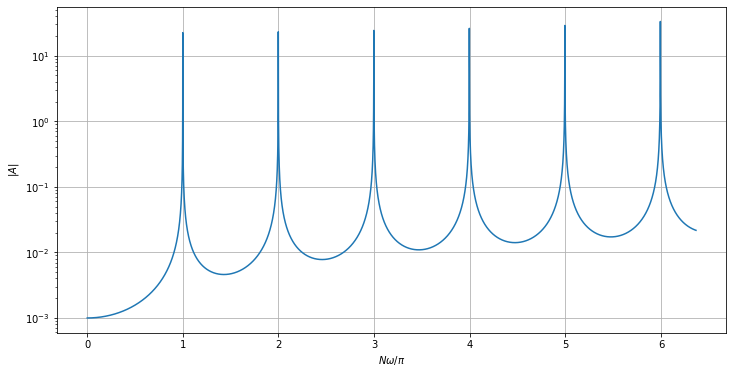

In [10]:
# graphique représentant l'amplitude |A|
plt.figure(figsize=(12,6))
plt.semilogy(N*X/np.pi, Y)
plt.grid()
plt.ylabel('$|A|$')
plt.xlabel('$N \omega/\pi$')


On voit que les valeurs des pulsations de résonance se trouvent à des valeurs entières de $N\omega/N$. Pour le vérifier visuellement, on peut ajouter des barres verticales pour les valeurs entières (même si ici la grille du graphique suffit).

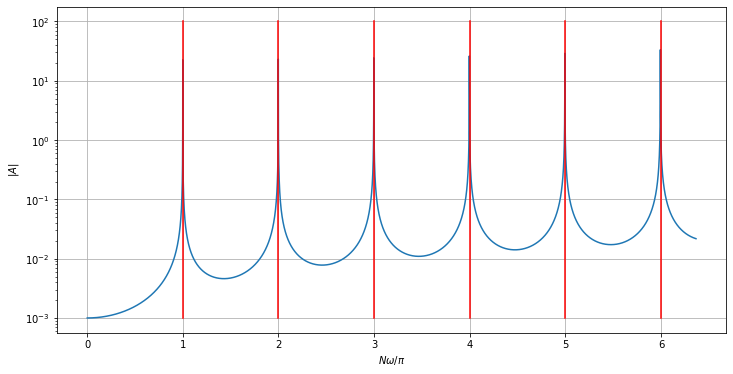

In [11]:
# graphique représentant l'amplitude |A|
plt.figure(figsize=(12,6))
plt.semilogy(N*X/np.pi, Y)
plt.grid()
plt.ylabel('$|A|$')
plt.xlabel('$N \omega/\pi$')

# barres verticales pour les valeurs entières
Y = [1e-3, 1e2]
for i in range(1,7):
    X = [i, i]
    plt.semilogy(X, Y, 'r')

Text(0.5, 0, '$N \\omega/\\pi$')

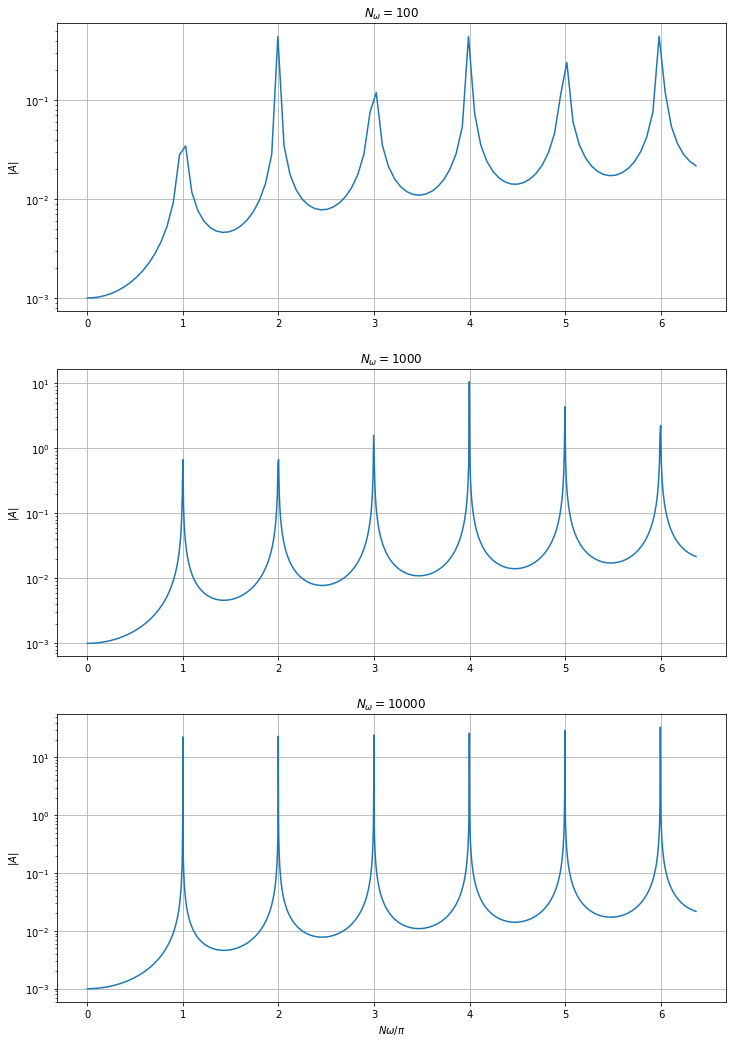

In [12]:
N = 1000
Nomega = [100, 1000, 10000]

fig, ax = plt.subplots(3,1, figsize=(12,18))

for _i, _Nomega in enumerate(Nomega):
    # valeurs des pulsations
    X = np.linspace(0, 20/N, _Nomega)

    # valeurs de l'amplitude |A|
    Y = amp_A(X, N)

    # graphique représentant l'amplitude |A|
    ax[_i].semilogy(N*X/np.pi, Y)
    ax[_i].grid()
    ax[_i].set_ylabel('$|A|$')
    ax[_i].set_title('$N_\omega = '+str(_Nomega)+'$')

ax[_i].set_xlabel('$N \omega/\pi$')

On voit que les valeurs de l'amplitude à résonance augmente avec le nombre de valeurs prises pour les pulsations $\omega$. Ceci est un effet de la discrétisation du graphique. En effet, à cause de la discrétisation, la valeur de la pulsation à résonance n'est pas exact et a une certaine erreur dûe au pas de discrétisation.

Plus le nombre de valeurs de $\omega$ augmente pour un intervalle donnée, plus le pas, c'est-à-dire l'écart entre 2 valeurs consécutives de $\omega$ est petit. On obtient ainsi des valeurs de $\omega$ qui sont plus proches de la résonance, et donc une amplitude $|A|$ plus élevée.

On peut le voir aussi avec le graphique suivant, en utilisant des marqueurs "points" plutôt qu'en reliant tous les points entre eux :

Text(0.5, 0, '$N \\omega/\\pi$')

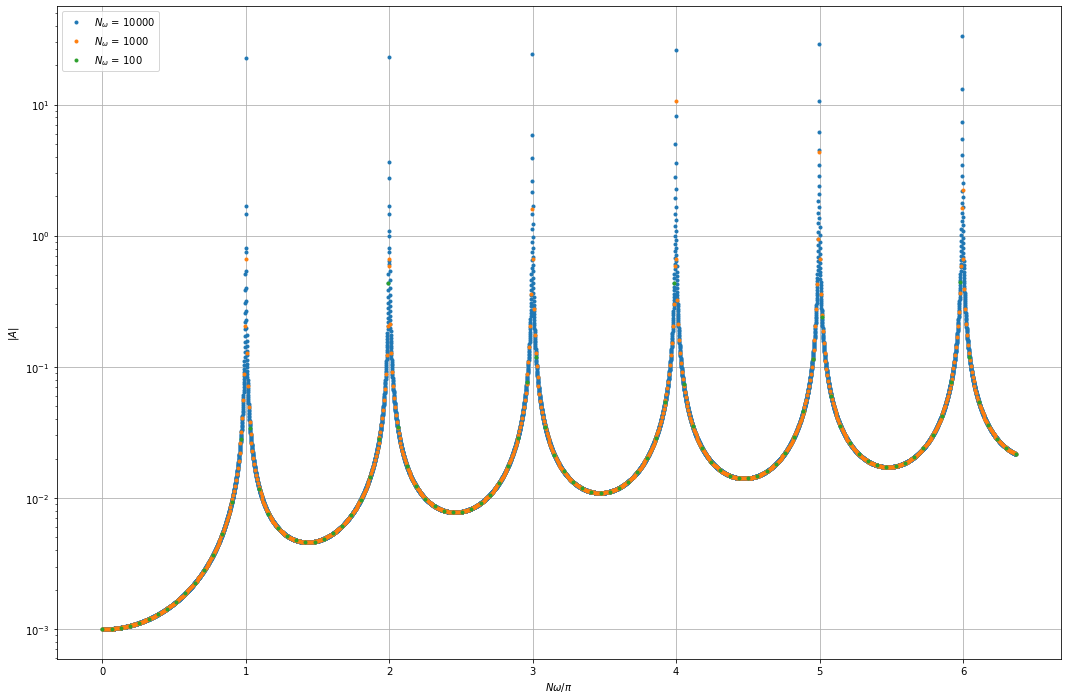

In [13]:
N = 1000
Nomega = [10000, 1000, 100]

plt.figure(figsize=(18,12))

for _i, _Nomega in enumerate(Nomega):
    # valeurs des pulsations
    X = np.linspace(0, 20/N, int(_Nomega))

    # valeurs de l'amplitude |A|
    Y = amp_A(X, N)

    # graphique représentant l'amplitude |A|
    plt.semilogy(N*X/np.pi, Y, '.', label = '$N_\omega$ = '+str(_Nomega))

plt.legend()
plt.grid()
plt.ylabel('$|A|$')
plt.xlabel('$N \omega/\pi$')


3) Représentez sur un même graphique les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$ pour les 4 premières valeurs des pulsations de résonance. Que pouvez-vous observer? Montrer graphiquement que les valeurs des éléments de la suite peuvent être représentés par un modèle sinusoïdal qui correspond à la pulsation de résonance, c'est-à-dire $v_n=\sin(\omega_r n)$.

Text(0.5, 0, 'n/N')

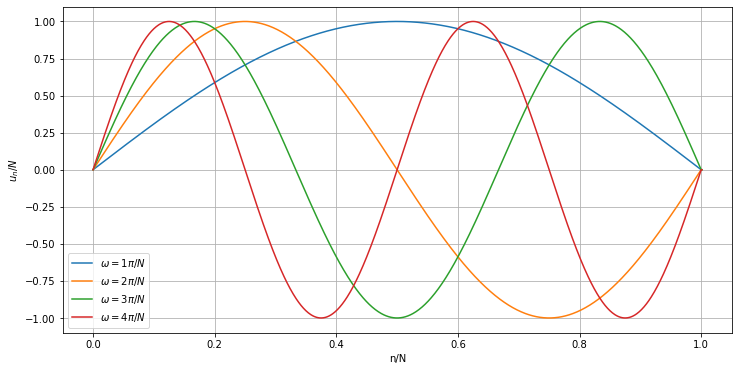

In [14]:
N = 1000

# indices des termes de la suite u_n/N
X = np.array(range(N+2))/N

# initialisation de la figure
plt.figure(figsize=(12,6))

# calcul des termes de la suite pour les 4 premières résonances
omega = np.array(range(1,5)) * np.pi/N
for _i, _omega in enumerate(omega):
    # calcul des termes de la suite
    el_suite = elements_suite_norm(_omega, N)
    # graphique représentant les termes de la suite u_n/N
    plt.plot(X, el_suite, label = '$\omega='+str(_i+1)+'\pi/N$')

plt.grid()
plt.legend()
plt.ylabel('$u_n/N$')
plt.xlabel('n/N')

On voit que les déplacements de masses semblent suivre une loi sinusoïdale, dont la fréquence spatiale augmente avec la pulsation de résonance. Nous allons vérifier cela graphiquement avec un modèle simple pour une fréquence de pulsation donnée.

No handles with labels found to put in legend.


Text(0.5, 0, 'n')

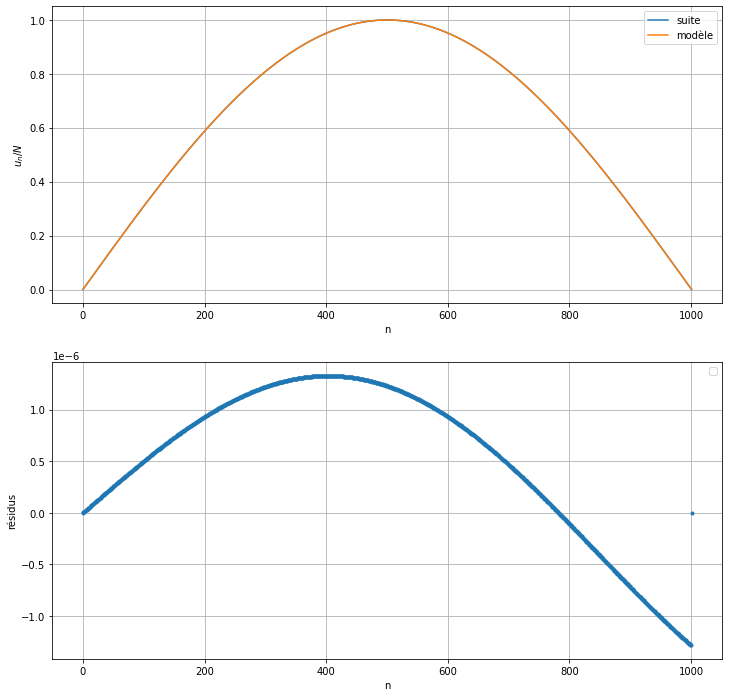

In [15]:
N = 1000

# indices des termes de la suite u_n/N
X = np.array(range(N+2))

# calcul des termes de la suite pour la première résonance
omega = np.pi/(N+1) # on voit ici que l'on a un meilleur accord entre modèle et valeurs de la suite pour cette pulsation
el_suite = elements_suite_norm(omega, N)

# calcul du modèle
el_suite_modele = np.sin(omega * X)

# initialisation de la figure
fig, ax = plt.subplots(2, 1, figsize=(12,12))

# graphique représentant les termes de la suite u_n et le modèle
ax[0].plot(X, el_suite, label = 'suite')
ax[0].plot(X, el_suite_modele, label = 'modèle')

ax[0].grid()
ax[0].legend()
ax[0].set_ylabel('$u_n/N$')
ax[0].set_xlabel('n')

# graphique représentant les résidus avec le modèle
ax[1].plot(X, el_suite - el_suite_modele, '.')

ax[1].grid()
ax[1].legend()
ax[1].set_ylabel('résidus')
ax[1].set_xlabel('n')

4) Les caractéristiques de la résonance changent elles lorsque vous faites varier le nombre N de masses et de ressort ? Vous pouvez comparer vos résultats pour $N=50, 1000, 10000$.

Regardons d'abord les valeurs des termes de la suite. On prend ici les valeurs entière de $\pi/(N+1)$, comme remarqué précédemment, pour les valeurs des pulsations de résonance.

Text(0.5, 0, 'n/(N+1)')

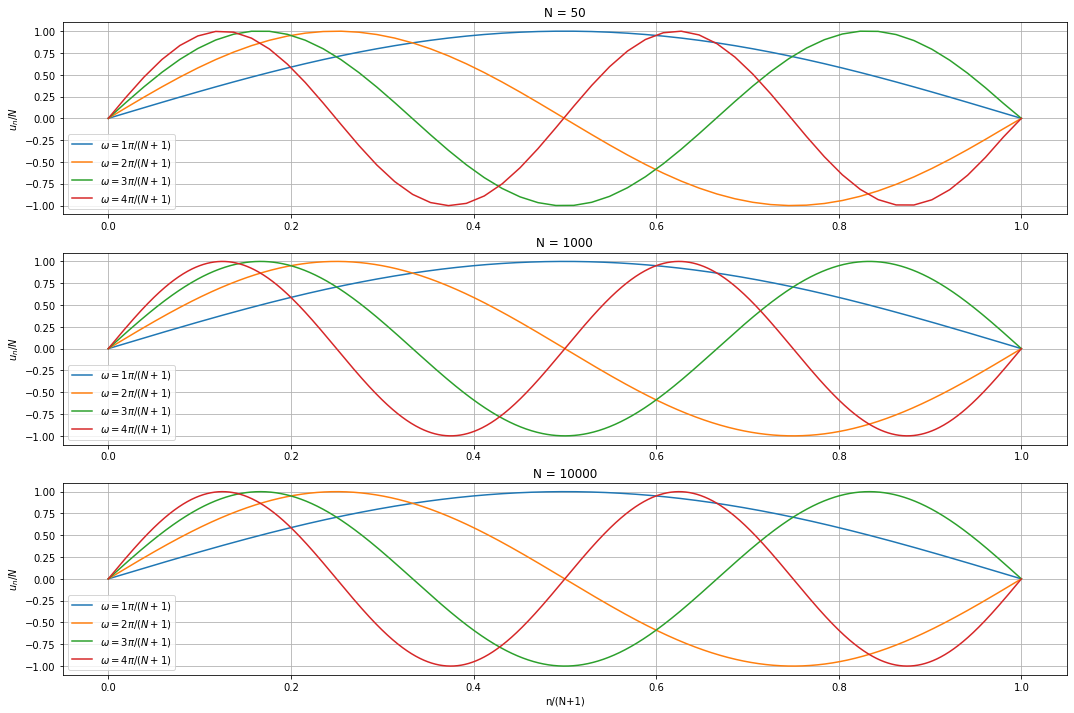

In [16]:
# valeurs de N
N = [50, 1000, 10000]

# initialisation de la figure
fig, ax = plt.subplots(3, 1, figsize = (18,12))

# itération des figures
for _j, _N in enumerate(N):
    # indices des termes de la suite u_n/N
    X = np.array(range(_N+2))/(_N+1)
    # calcul des termes de la suite pour les 4 premières résonances
    omega = np.array(range(1,5)) * np.pi/(_N+1)
    for _i, _omega in enumerate(omega):
        # calcul des termes de la suite
        el_suite = elements_suite_norm(_omega, _N)
        # graphique représentant les termes de la suite u_n/N
        ax[_j].plot(X, el_suite, label = '$\omega='+str(_i+1)+'\pi/(N+1)$')
    ax[_j].grid()
    ax[_j].legend()
    ax[_j].set_ylabel('$u_n/N$')
    ax[_j].set_title('N = '+str(_N))
ax[_j].set_xlabel('n/(N+1)')

On voit que les valeurs des termes de la suite normalisées restent les mêmes quelques soient le nombre de ressorts et de masses. Si on utilise les valeurs entières de $\pi/N$ pour les pulsations de résonance, on remarque une différence pour $N$ faible quand à la valeur extrême (pour $n=N+1$)

Text(0.5, 0, 'n/N')

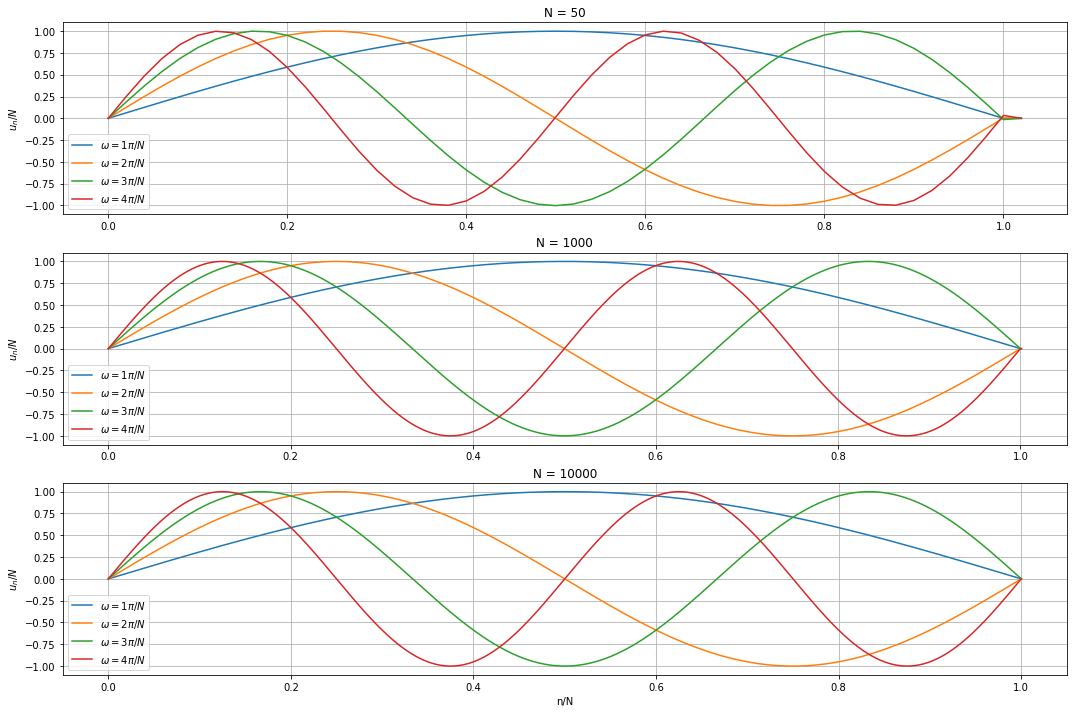

In [17]:
# valeurs de N
N = [50, 1000, 10000]

# initialisation de la figure
fig, ax = plt.subplots(3, 1, figsize = (18,12))

# itération des figures
for _j, _N in enumerate(N):
    # indices des termes de la suite u_n/N
    X = np.array(range(_N+2))/_N
    # calcul des termes de la suite pour les 4 premières résonances
    omega = np.array(range(1,5)) * np.pi/_N
    for _i, _omega in enumerate(omega):
        # calcul des termes de la suite
        el_suite = elements_suite_norm(_omega, _N)
        # graphique représentant les termes de la suite u_n/N
        ax[_j].plot(X, el_suite, label = '$\omega='+str(_i+1)+'\pi/N$')
    ax[_j].grid()
    ax[_j].legend()
    ax[_j].set_ylabel('$u_n/N$')
    ax[_j].set_title('N = '+str(_N))
ax[_j].set_xlabel('n/N')

Regardons maintenant les valeurs des valeurs absolues des amplitudes, pour différentes valeurs de $N$.

Text(0.5, 0, '$N \\omega/\\pi$')

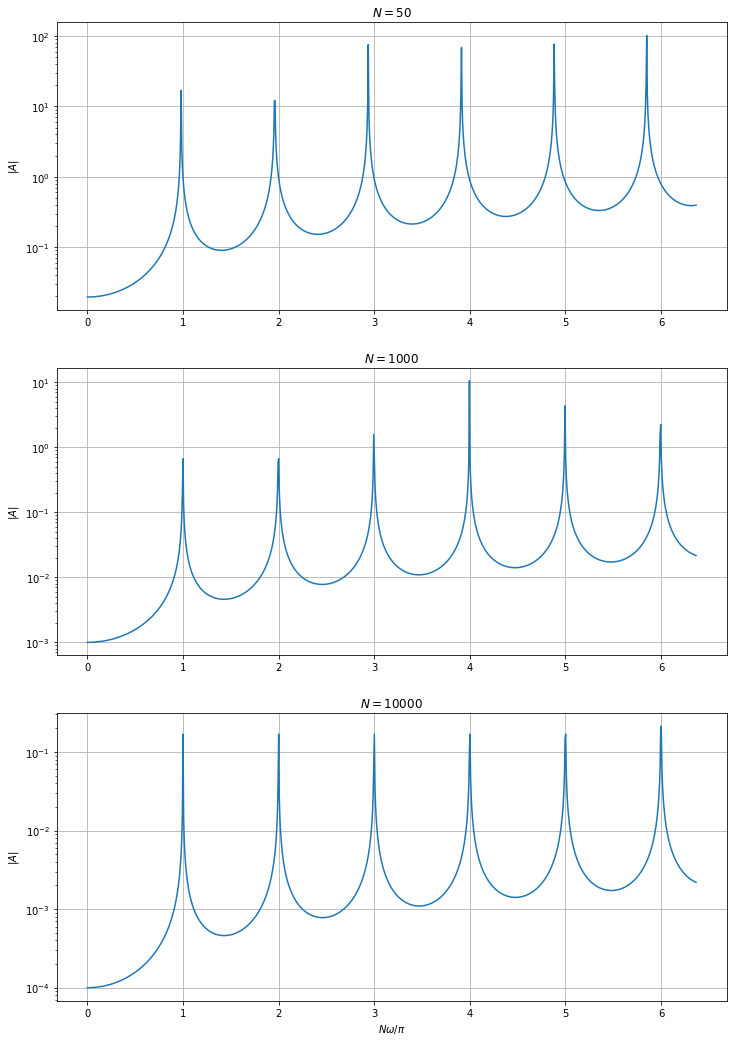

In [18]:
# valeurs de N
N = [50, 1000, 10000]

Nomega = 1000

fig, ax = plt.subplots(3,1, figsize=(12,18))

for _i, _N in enumerate(N):
    # valeurs des pulsations
    X = np.linspace(0, 20/_N, Nomega)

    # valeurs de l'amplitude |A|
    Y = amp_A(X, _N)

    # graphique représentant l'amplitude |A|
    ax[_i].semilogy(_N*X/np.pi, Y)
    ax[_i].grid()
    ax[_i].set_ylabel('$|A|$')
    ax[_i].set_title('$N = '+str(_N)+'$')

ax[_i].set_xlabel('$N \omega/\pi$')

On peut faire 2 remarques:
- les valeurs de l'amplitude baissent pour $N$ élevé, ce qui peut s'expliquer par une masse total plus élevée et donc un déplacement moindre pour chacune des masses
- les valeurs des amplitudes pour $N$ faible ne sont pas exactement aux valeurs entières de $N\pi/N$, et donc ces valeurs semblent être des approximations pour des valeurs de $N$ élevées

### Partie II

Les masses de $0$ à $N/2$ valent maintenant $m'=rm$. La suite d'éléments $u_n$ est donnée par $$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-r\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n\le N/2 \ \ \ ,$$ $$u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n > N/2 \ \ \ .$$
Le facteur $A$ est toujours donné par la même expression. On utilisera $N=1000$ pour toute cette partie.

5) Représentez sur un même graphique l'amplitude $|A|$ en fonction du paramètre $N \omega / \pi$ pour $\omega=[0,4/N]$, et $r=1,2,3,4,5$. On utilisera 10000 valeurs de la pulsation $\omega$ et une échelle logarithmique pour l'axe des ordonnées. Que pouvez-vous constater qualitativement en comparant les pulsations de résonance pour les différentes valeurs de $r$?

In [21]:
def amp_A(omega, N, r):
    ''' Renvoie la valeur absolue de l'amplitude A
    
    Note: dans cette fonction les termes de la suite ne sont pas mis en mémoire dans un tableau,
    ce qui optimise l'utilisation de la mémoire. De plus, cela permet d'
    
    Args:
        omega (numpy array): pulsation
        N (int): nombre de masses et de ressorts

    Returns:
        float: valeur absolue de l'amplitude A

    '''
    # initialisation de la liste des termes de la suite 
    u0 = 0
    u1 = 1

    # itération des termes de la suite
    for _i in range(2,N+1):
        if _i <= N/2:
            u2 = (2 - r * omega**2) * u1 - u0
        else:
            u2 = (2 - omega**2) * u1 - u0
        u0 = u1
        u1 = u2
    
    # calcul de l'amplitude
    A = 1 / ((2 - omega**2) * u1 - u0)

    # retour de la valeur absolue de l'amplitude A
    return np.abs(A)

Text(0.5, 0, '$N \\omega/\\pi$')

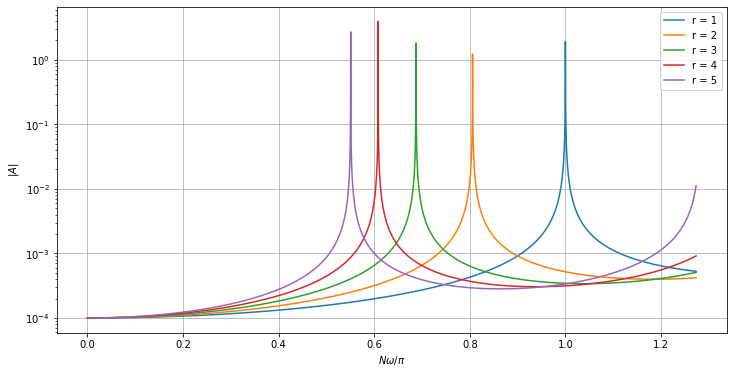

In [22]:
# paramètres
N = 10000
omega = np.linspace(0, 4/N, N)

# initialisation de la figure
plt.figure(figsize=(12,6))

# graphique
r = np.array(range(1,6))
for _r in r:
    A = amp_A(omega, N, _r)
    plt.semilogy(N*omega/np.pi, A, label = 'r = '+str(_r))

plt.grid()
plt.legend()
plt.ylabel('$|A|$')
plt.xlabel('$N \omega/\pi$')

On voit que plus la valeur de $r$ augmente, plus la valeur de la pulsation à la première résonance diminue.

6) Trouver numériquement la valeur de la première pulsation de résonance $\omega_1$ pour $r=1,2,3,4,5$. Pour cela, vous pourrez utiliser la fonction ```find_peaks()``` du module ```scipy.signal``` (voir en annexe comment utiliser cette fonction). Votre observation qualitative de la question précédente est-elle vérifiée?

In [23]:
from scipy.signal import find_peaks

Text(0.5, 0, '$N \\omega/\\pi$')

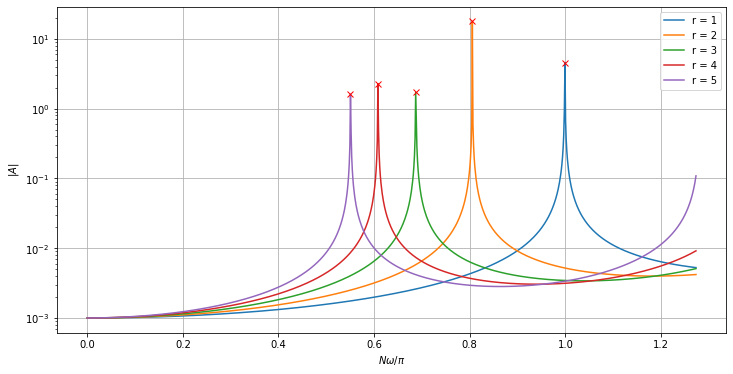

In [31]:
# paramètres
N = 1000
omega = np.linspace(0, 4/N, N)

# initialisation de la figure
plt.figure(figsize=(12,6))

# valeurs de r et de omega_1
r = np.array(range(1,6))
omega_1 = np.empty(r.shape)

# graphique
for _i, _r in enumerate(r):
    # calcul de l'amplitude
    A = amp_A(omega, N, _r)

    # trouver la résonance
    peaks, _ = find_peaks(A)
    omega_1[_i] = omega[peaks]

    # graphique
    plt.semilogy(N*omega/np.pi, A, label = 'r = '+str(_r))
    plt.semilogy(N*omega[peaks]/np.pi, A[peaks], "rx")

plt.grid()
plt.legend()
plt.ylabel('$|A|$')
plt.xlabel('$N \omega/\pi$')


7) Comparer sur un même graphique les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$, pour la première pulsation de résonance $\omega=\omega_1$ et pour les différentes valeurs de $r$ considérées. Que constatez-vous?

In [32]:
def elements_suite_norm(omega, N, r):
    ''' Renvoie les éléments de la suite u_n normalisés par le maximum de la suite 
    
    Args:
        omega (float): pulsation
        N (int): nombre de masses et de ressorts

    Returns:
        numpy array: éléments de la suite normalisés

    '''
    # initialisation du tableau numpy des termes de la suite 
    suite = np.empty(N+2)
    suite[0] = 0.
    suite[1] = 1.
    suite[N+1] = 0.

    # itération des termes de la suite
    for _i in range(2,N+1):
        if _i <= N/2:
            suite[_i] = (2 - r * omega**2) * suite[_i-1] - suite[_i-2]
        else:
            suite[_i] = (2 - omega**2) * suite[_i-1] - suite[_i-2]

    # retour
    return suite/np.max(suite)

Text(0, 0.5, '$u_n/N$')

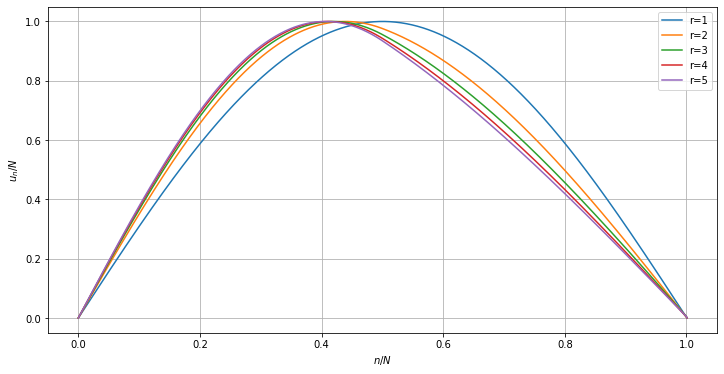

In [33]:
# initialisation de la figure
plt.figure(figsize=(12,6))

# itérations
for _i, _omega in enumerate(omega_1):
    # calcul des éléments de la suite
    suite = elements_suite_norm(_omega, N, r[_i])

    # indices normés de la suite
    X = np.array(range(N+2))/N

    # graphique
    plt.plot(X, suite, label='r='+str(r[_i]))

plt.grid()
plt.legend()
plt.xlabel('$n/N$')
plt.ylabel('$u_n/N$')

8) Représentez graphiquement $\omega_1$ en fonction de $r$ pour $r$ variant de $1$ à $100$, en utilisant des échelles logarithmiques pour les deux axes. On peut montrer que $\omega_1 \simeq (4.06/N\sqrt{r})$ pour $N$ et $r$ assez grands. Vérifiez vous cette relation?

In [36]:
r = np.array(range(1,101))
omega_1 = np.empty(r.shape)

for _i, _r in enumerate(r):

    # calcul de l'amplitude
    A = amp_A(omega, N, _r)

    # trouver la résonance
    peaks, _ = find_peaks(A)
    omega_1[_i] = omega[peaks[0]]

omega_1_model = 4.06/(N * np.sqrt(r))

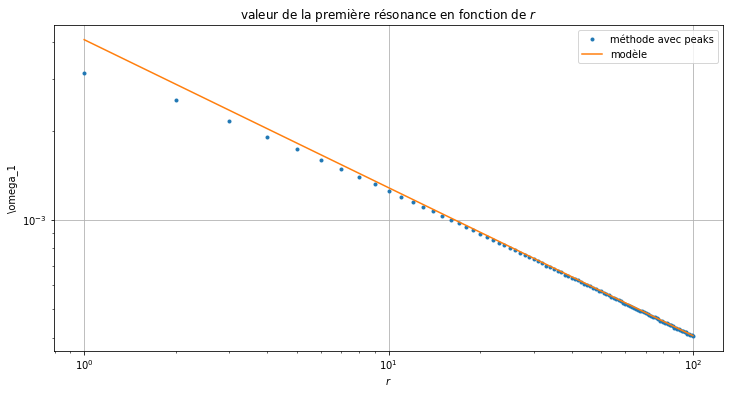

In [39]:
plt.figure(figsize=(12, 6))
plt.loglog(r, omega_1, '.', label = 'méthode avec peaks')
plt.loglog(r, omega_1_model, '-', label = 'modèle')
plt.grid()
plt.title('valeur de la première résonance en fonction de $r$')
plt.xlabel('$r$')
plt.ylabel('$\omega_1$')
plt.legend()

La relation est bien vérifiée pour r suffisamment grand